In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 0. Preprocessing

Using the code we are merging all the csv files for better understanding of the data.

In [4]:
customer_df = pd.read_csv('final/customers.csv', sep='|')

directory = './final'
dfs = []

for filename in os.listdir(directory):
    if filename.startswith('transactions'):
        print(f'Reading {filename}...')
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath, sep='|')
        dfs.append(df)
    else:
        print(f'{filename} is not a CSV file. Skipping...')

if len(dfs) > 0:
    transaction_df = pd.concat(dfs, ignore_index=True)
    print(f'Successfully merged {len(dfs)} dataframes into one.')
else:
    print('No CSV files found in directory.')

df = customer_df.merge(transaction_df, on=['cc_num', 'acct_num'])

.ipynb_checkpoints is not a CSV file. Skipping...
customers.csv is not a CSV file. Skipping...
Reading transactions_0.csv...
Reading transactions_1.csv...
Reading transactions_10.csv...
Reading transactions_100.csv...
Reading transactions_101.csv...
Reading transactions_102.csv...
Reading transactions_103.csv...
Reading transactions_104.csv...
Reading transactions_105.csv...
Reading transactions_106.csv...
Reading transactions_107.csv...
Reading transactions_108.csv...
Reading transactions_109.csv...
Reading transactions_11.csv...
Reading transactions_110.csv...
Reading transactions_111.csv...
Reading transactions_112.csv...
Reading transactions_113.csv...
Reading transactions_114.csv...
Reading transactions_115.csv...
Reading transactions_116.csv...
Reading transactions_117.csv...
Reading transactions_118.csv...
Reading transactions_119.csv...
Reading transactions_12.csv...
Reading transactions_120.csv...
Reading transactions_121.csv...
Reading transactions_122.csv...
Reading transact

This line of code is used to determine the distribution of the is_fraud column in the DataFrame df. The value_counts method counts the occurrence of each unique value in the is_fraud column. When the normalize=True parameter is used, the method returns the relative frequencies of the unique values (the proportion rather than the count).

For a binary classification problem like fraud detection, where is_fraud is likely to be 1 (fraud) or 0 (non-fraud), this line of code will provide the proportion of fraudulent and non-fraudulent transactions in the dataset. This can help identify if the dataset is imbalanced, which is a common situation in fraud detection.

In [5]:
df['is_fraud'].value_counts(normalize=True)

0    0.998819
1    0.001181
Name: is_fraud, dtype: float64

This output suggests that 98.75% of the transactions are non-fraudulent and 1.25% are fraudulent, indicating a highly imbalanced dataset. In such a case, special techniques may be needed when building the machine learning model to ensure that it can accurately predict the minority class (fraud).

# 1. Exploratory Data Analysis

In [6]:
data = df

In [7]:
data.shape

(4260904, 23)

```text
- ssn: Social Security Number of the customer (object)
- cc_num: Credit card number of the customer (object)
- first: First name of the customer (object)
- last: Last name of the customer (object)
- gender: Gender of the customer (object)
- street: Street address of the customer (object)
- city: City of the customer (object)
- state: State of the customer (object)
- zip: Zip code of the customer (integer)
- lat: Latitude of the customer's location (float)
- long: Longitude of the customer's location (float)
- city_pop: Population of the city where the customer is located (integer)
- job: Occupation of the customer (object)
- dob: Date of birth of the customer (object)
- acct_num: Bank account number of the customer (object)
- trans_num: Transaction number (object)
- unix_time: Unix timestamp of the transaction (object)
- category: Category of the transaction (object)
- amt: Amount of the transaction (float)
- is_fraud: Indicates whether the transaction is fraudulent or not (object)
- merchant: Name of the merchant involved in the transaction (object)
- merch_lat: Latitude of the merchant's location (float)
- merch_long: Longitude of the merchant's location (float)
```

In [8]:
data.head(3)

,ssn,cc_num,first,last,gender,street,city,state,zip,lat,...,dob,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long
0,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,...,1959-10-03,888022315787,91ab12e73ef38206e1121e9648d2408d,1558719550,gas_transport,69.12,0,Phillips Group,39.491416,-75.588522
1,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,...,1959-10-03,888022315787,071553d533a6822a4431c354c434ddcb,1569425519,grocery_pos,68.11,0,Tucker Ltd,40.890319,-75.573359
2,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,...,1959-10-03,888022315787,0cfad38ef15e4749eff68dc83f62c151,1577205601,misc_net,40.35,0,Dixon PLC,39.244958,-74.475327


In [9]:
print('Data shape:', data.shape)

Data shape: (4260904, 23)


Check missing values

In [10]:
data.isna().sum()

ssn           0
cc_num        0
first         0
last          0
gender        0
street        0
city          0
state         0
zip           0
lat           0
long          0
city_pop      0
job           0
dob           0
acct_num      0
trans_num     0
unix_time     0
category      0
amt           0
is_fraud      0
merchant      0
merch_lat     0
merch_long    0
dtype: int64

In [11]:
data.describe()

,zip,lat,long,city_pop,amt,merch_lat,merch_long
count,4.260904e+06,4.260904e+06,4.260904e+06,4.260904e+06,4.260904e+06,4.260904e+06,4.260904e+06
mean,5.190384e+04,3.735269e+01,-9.247593e+01,3.038011e+05,6.898790e+01,3.735276e+01,-9.247610e+01
std,2.996720e+04,5.474364e+00,1.740613e+01,5.696231e+05,1.618467e+02,5.504630e+00,1.741603e+01
min,1.571000e+03,1.958930e+01,-1.593683e+02,1.050000e+02,1.000000e+00,1.859001e+01,-1.603677e+02
25%,2.750500e+04,3.378360e+01,-9.868950e+01,2.010300e+04,9.100000e+00,3.370138e+01,-9.903072e+01
50%,4.920200e+04,3.824200e+01,-8.717940e+01,6.759300e+04,4.449000e+01,3.819365e+01,-8.727445e+01
75%,7.870400e+04,4.098200e+01,-7.994400e+01,2.420370e+05,8.158000e+01,4.120567e+01,-7.966098e+01
max,9.970500e+04,6.478050e+01,-6.824480e+01,2.906700e+06,4.130053e+04,6.577610e+01,-6.724632e+01


In [12]:
data.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
ssn,4260904,983,205-73-5783,10912
cc_num,4260904,983,347208496498560,10912
first,4260904,365,Jennifer,108945
last,4260904,479,Williams,110907
gender,4260904,2,F,2175896
street,4260904,983,2531 Diane Landing Apt. 510,10912
city,4260904,726,Brooklyn,74282
state,4260904,51,CA,505426
job,4260904,505,Computer games developer,33859
dob,4260904,962,1999-12-23,16747


The output will provide a useful overview of the categorical data in the DataFrame, and it can be especially helpful for exploratory data analysis.

Target is highly imbalanced. 99.9% of the data is non-fraudulent transactions.

In [13]:
target = 'is_fraud'

data[target].value_counts(normalize=True)

0    0.998819
1    0.001181
Name: is_fraud, dtype: float64

The output will be the distribution of non-fraudulent and fraudulent transactions in the dataset. This is important for understanding whether the dataset is balanced or imbalanced.

In this output, approximately 99.88% of the transactions are non-fraudulent and 0.011% are fraudulent. This indicates that the dataset is highly imbalanced, which is a common situation in fraud detection. Special techniques might be required when building the machine learning model to ensure that it can accurately predict the minority class (fraud).

# 2. Feature Engineering

This process is a part of the feature selection step in machine learning model preparation, where irrelevant or less important features are removed to reduce noise, overfitting, and computational cost. In this case, it seems that the features being dropped are unique identifiers that likely have no predictive power for the target variable

In [14]:
data.head(3)

,ssn,cc_num,first,last,gender,street,city,state,zip,lat,...,dob,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long
0,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,...,1959-10-03,888022315787,91ab12e73ef38206e1121e9648d2408d,1558719550,gas_transport,69.12,0,Phillips Group,39.491416,-75.588522
1,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,...,1959-10-03,888022315787,071553d533a6822a4431c354c434ddcb,1569425519,grocery_pos,68.11,0,Tucker Ltd,40.890319,-75.573359
2,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,...,1959-10-03,888022315787,0cfad38ef15e4749eff68dc83f62c151,1577205601,misc_net,40.35,0,Dixon PLC,39.244958,-74.475327


## 2.1 ID/NUM related features
Just remove them, because they are not useful

In [15]:
# these features are not useful for our model
invalid_features = ['ssn', 'cc_num', 'acct_num', 'trans_num']

data.drop(columns=invalid_features, inplace=True)

## 2.2 Name
I will drop name features as it may case bias, privacy issue

In [16]:
data.drop(columns=['first', 'last'], inplace=True)

## 2.3 Gender

The plot shows, in the fraudulent transactions, there are more female related transactions than male.

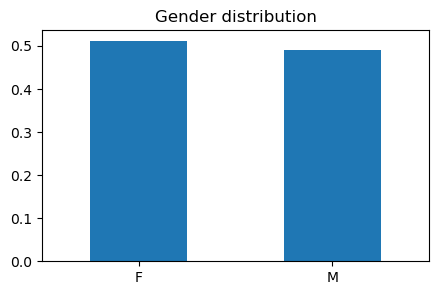

In [17]:
plt.figure(figsize=(5, 3))
data.gender.value_counts(normalize=True).plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Gender distribution')
plt.show()

The code groups data by the target variable (indicating fraud) and gender, calculates the ratio of each gender within each group, and creates a bar chart to show the gender distribution in different fraud classes. The chart displays the ratio of genders for each class, with different colors representing different genders.

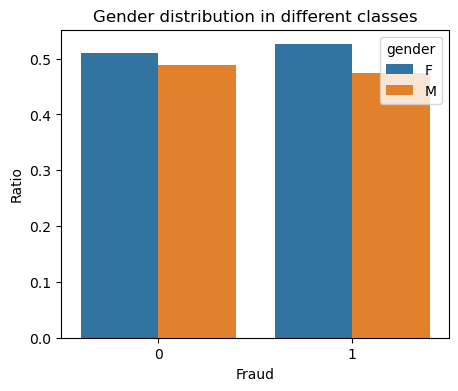

In [18]:
# group by gender and calculate the mean of is_fraud
gender_stats = data.groupby(target)['gender'].value_counts(normalize=True)
gender_stats = pd.DataFrame(gender_stats)
gender_stats.columns = ['ratio']
gender_stats = gender_stats.reset_index()

# plot bar chart, hue by gender
plt.figure(figsize=(5, 4))
sns.barplot(x=target, y='ratio', data=gender_stats, hue='gender', )
plt.xlabel('Fraud')
plt.ylabel('Ratio')
plt.title('Gender distribution in different classes')
plt.show()

In [19]:
# convert gender to numeric, 0 for Male and 1 for female
data.gender.replace({'M': 0, 'F': 1}, inplace=True)

## 2.4 customer geo information
Features like street, city, state, zip, lat, long, city_pop are all related to customer's geo information.

In [20]:
customer_geo_features = ['street', 'city', 'state', 'zip', 'lat', 'long',]

In [21]:
data[customer_geo_features].head(3)

,street,city,state,zip,lat,long
0,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156
1,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156
2,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156


In [22]:
data[['street', 'city', 'state']].describe().T

,count,unique,top,freq
street,4260904,983,2531 Diane Landing Apt. 510,10912
city,4260904,726,Brooklyn,74282
state,4260904,51,CA,505426


In [23]:
data.zip.nunique()

939

Conclusions:
1. there are 983 customers (983 ssn) and 983 unique streets, so we can use street as a unique identifier for each customer
2. there are 726 unique cities, 51 unique states, 939 unique zip codes
3. as street is close to zip in terms of uniqueness, I will keep any one of them, and treat it as categorical feature

In [24]:
# drop street
data.drop(['street'], axis=1, inplace=True)

In [25]:
# treat city, state and zip as categorical features

## 2.5 job

In [26]:
data.job.value_counts()

Computer games developer      33859
Radio producer                28746
Patent attorney               27990
Teacher, adult education      27692
General practice doctor       27279
                              ...  
Waste management officer        358
Nurse, learning disability      358
Geneticist, molecular            12
Sales executive                   7
Loss adjuster, chartered          7
Name: job, Length: 505, dtype: int64

In [27]:
# group by job and calculate the mean of is_fraud
data.groupby('job')['is_fraud'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)

,mean,count
job,,
Sales executive,1.000000,7
"Loss adjuster, chartered",1.000000,7
"Geneticist, molecular",1.000000,12
Estate manager/land agent,0.047872,376
Transport planner,0.029810,369
...,...,...
Quality manager,0.000000,3636
"Engineer, maintenance (IT)",0.000000,5096
Commercial/residential surveyor,0.000000,3994


In [28]:
from IPython.display import display

In [29]:
for job in ['Sales executive', 'Loss adjuster, chartered', 'Geneticist, molecular']:
    df = data[data.job == job]
    print('Job:', job)
    display(df)

Job: Sales executive


,gender,city,state,zip,lat,long,city_pop,job,dob,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long
2127644,0,New Britain,CT,6053,41.6867,-72.7908,73240,Sales executive,1946-06-03,1666541548,gas_transport,14.83,1,"Jennings, Wagner and Cox",41.817913,-73.507644
2127645,0,New Britain,CT,6053,41.6867,-72.7908,73240,Sales executive,1946-06-03,1666609442,misc_net,322.95,1,Fuentes PLC,42.201883,-71.795214
2127646,0,New Britain,CT,6053,41.6867,-72.7908,73240,Sales executive,1946-06-03,1666700484,shopping_pos,880.56,1,"Rodriguez, Thompson and Byrd",41.921395,-73.042722
2127647,0,New Britain,CT,6053,41.6867,-72.7908,73240,Sales executive,1946-06-03,1666615214,misc_net,839.68,1,Nelson LLC,41.745476,-73.277530
2127648,0,New Britain,CT,6053,41.6867,-72.7908,73240,Sales executive,1946-06-03,1666699118,shopping_net,910.54,1,Stewart PLC,42.503237,-73.123091
2127649,0,New Britain,CT,6053,41.6867,-72.7908,73240,Sales executive,1946-06-03,1666701447,shopping_net,1001.57,1,Smith Ltd,42.276457,-73.487543
2127650,0,New Britain,CT,6053,41.6867,-72.7908,73240,Sales executive,1946-06-03,1666582942,grocery_pos,882.28,1,"Smith, Griffith and Andrews",40.727976,-72.262574


Job: Loss adjuster, chartered


,gender,city,state,zip,lat,long,city_pop,job,dob,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long
3347956,0,Fort Wayne,IN,46814,41.0456,-85.3058,305409,"Loss adjuster, chartered",1956-10-14,1659462124,gas_transport,8.63,1,"Adams, Galloway and Hale",40.169509,-86.267163
3347957,0,Fort Wayne,IN,46814,41.0456,-85.3058,305409,"Loss adjuster, chartered",1956-10-14,1659461625,grocery_pos,280.77,1,"Wright, Morris and Berry",41.995205,-86.032207
3347958,0,Fort Wayne,IN,46814,41.0456,-85.3058,305409,"Loss adjuster, chartered",1956-10-14,1659490822,grocery_pos,318.04,1,Robinson LLC,40.390987,-86.305156
3347959,0,Fort Wayne,IN,46814,41.0456,-85.3058,305409,"Loss adjuster, chartered",1956-10-14,1659451753,grocery_pos,289.34,1,"Campbell, Morales and Lewis",41.491843,-84.516130
3347960,0,Fort Wayne,IN,46814,41.0456,-85.3058,305409,"Loss adjuster, chartered",1956-10-14,1659620446,shopping_pos,806.60,1,Anderson-Stout,40.187452,-84.651411
3347961,0,Fort Wayne,IN,46814,41.0456,-85.3058,305409,"Loss adjuster, chartered",1956-10-14,1659534864,misc_net,753.01,1,"Wright, Brooks and Ellis",40.702016,-84.384925
3347962,0,Fort Wayne,IN,46814,41.0456,-85.3058,305409,"Loss adjuster, chartered",1956-10-14,1659528259,misc_net,843.64,1,Cox-Morrow,42.037215,-86.134604


Job: Geneticist, molecular


,gender,city,state,zip,lat,long,city_pop,job,dob,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long
4080333,0,Macomb,MI,48044,42.6442,-82.8985,79580,"Geneticist, molecular",1939-03-27,1664811231,gas_transport,12.12,1,"Heath, Williams and Brown",43.301709,-82.870610
4080334,0,Macomb,MI,48044,42.6442,-82.8985,79580,"Geneticist, molecular",1939-03-27,1664816036,grocery_pos,320.70,1,"Porter, Holland and Lawson",42.507124,-82.315205
4080335,0,Macomb,MI,48044,42.6442,-82.8985,79580,"Geneticist, molecular",1939-03-27,1664836362,grocery_pos,308.23,1,Wong-Martinez,42.635579,-82.459486
4080336,0,Macomb,MI,48044,42.6442,-82.8985,79580,"Geneticist, molecular",1939-03-27,1664972014,shopping_pos,308.19,1,Mathis-Brown,43.487579,-82.433696
4080337,0,Macomb,MI,48044,42.6442,-82.8985,79580,"Geneticist, molecular",1939-03-27,1664962357,misc_net,811.95,1,"Davis, Snyder and Flores",43.108139,-82.009246
4080338,0,Macomb,MI,48044,42.6442,-82.8985,79580,"Geneticist, molecular",1939-03-27,1664971134,shopping_net,759.38,1,Wilson LLC,42.412717,-82.417483
4080339,0,Macomb,MI,48044,42.6442,-82.8985,79580,"Geneticist, molecular",1939-03-27,1664884458,misc_net,8.08,1,Henry-Bender,43.102477,-82.830772
4080340,0,Macomb,MI,48044,42.6442,-82.8985,79580,"Geneticist, molecular",1939-03-27,1664951921,shopping_pos,1097.29,1,"Collins, Nicholson and Jones",42.950732,-83.843758
4080341,0,Macomb,MI,48044,42.6442,-82.8985,79580,"Geneticist, molecular",1939-03-27,1664970417,food_dining,1036.85,1,Flowers-Obrien,43.046625,-83.574841
4080342,0,Macomb,MI,48044,42.6442,-82.8985,79580,"Geneticist, molecular",1939-03-27,1664969064,shopping_net,1013.80,1,Simmons LLC,42.818848,-82.583576


Conclusion: 

- the mean of fraud rate for these jobs are 1., but it does not mean that all the customers with these jobs are fraudsters, just because the number of customers with these jobs are very small.

# 2.6 dob
Calculate the age of the customer, and drop dob

In [30]:
dob = data[['dob']].drop_duplicates()

In [31]:
dob.head(3)

,dob
0,1959-10-03
3278,1963-06-07
4749,1973-05-30


In [32]:
dob['age'] = dob.dob.apply(lambda x: 2023 - int(x.split('-')[0]))
data = data.merge(dob, on='dob', how='left')
data.drop(columns=['dob'], inplace=True)

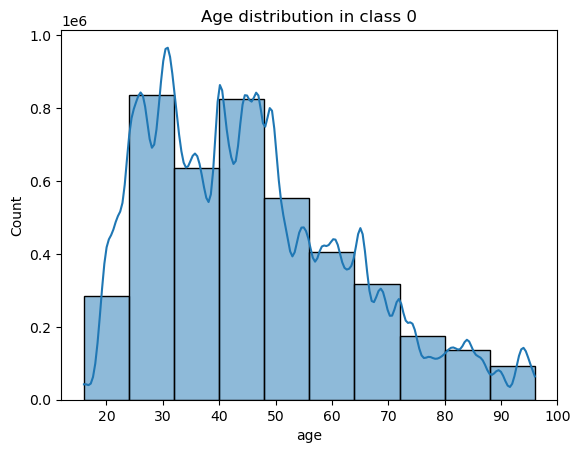

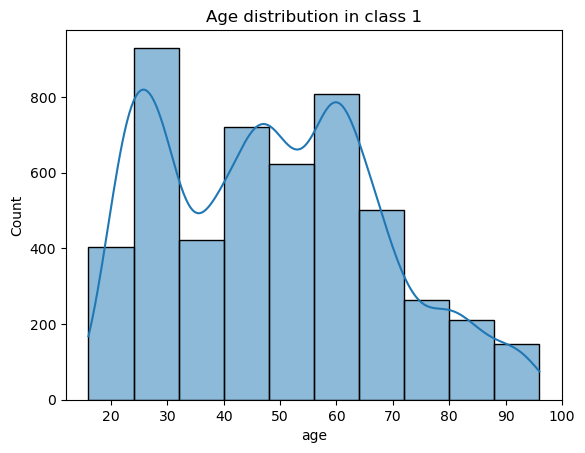

In [33]:
# distribution of age by is_fraud
for label in (0, 1):
    sub_df = data[data[target] == label]
    sns.histplot(data=sub_df, x="age", kde=True, bins=10)
    plt.title(f'Age distribution in class {label}')
    plt.show()

Conclusion
- As is show in the plot, in the fraudulent transactions, the age between 20\~30, 40\~50 and 60s are more frequent.

# 2.7 unix_time

In [34]:
unix_time = 1558719550
# get month, day, hour, minute
print('month:', pd.to_datetime(unix_time, unit='s').month)

month: 5


In [35]:
unix_time = pd.to_datetime(data.unix_time, unit='s')

In [36]:
data['trans_year'] = unix_time.dt.year
data['trans_month'] = unix_time.dt.month
data['trans_day'] = unix_time.dt.day
data['trans_hour'] = unix_time.dt.hour

In [37]:
data.drop(columns=['unix_time'], inplace=True)

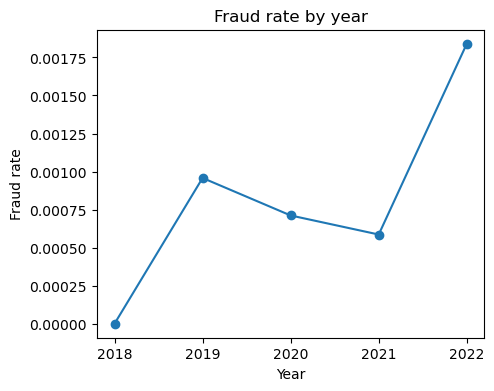

In [38]:
# groupy by year and calculate the mean of is_fraud
yearly = data.groupby('trans_year')['is_fraud'].mean().sort_index(ascending=True)

plt.figure(figsize=(5, 4))
yearly.plot(kind='line', marker='o')
plt.xticks(rotation=0)
plt.xlabel('Year')
plt.ylabel('Fraud rate')
plt.title('Fraud rate by year')
plt.xticks(yearly.index, yearly.index)
plt.show()

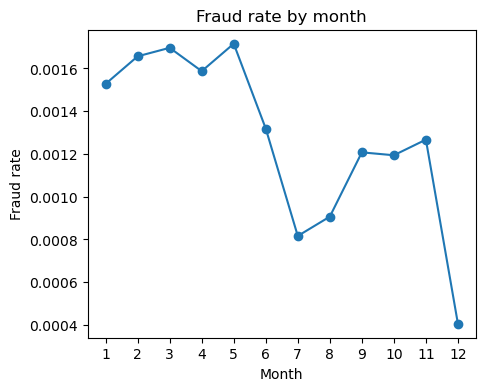

In [39]:
monthly = data.groupby('trans_month')['is_fraud'].mean().sort_index(ascending=True)

plt.figure(figsize=(5, 4))
monthly.plot(kind='line', marker='o')
plt.xticks(rotation=0)
plt.xlabel('Month')
plt.ylabel('Fraud rate')
plt.title('Fraud rate by month')
plt.xticks(monthly.index, monthly.index)
plt.show()

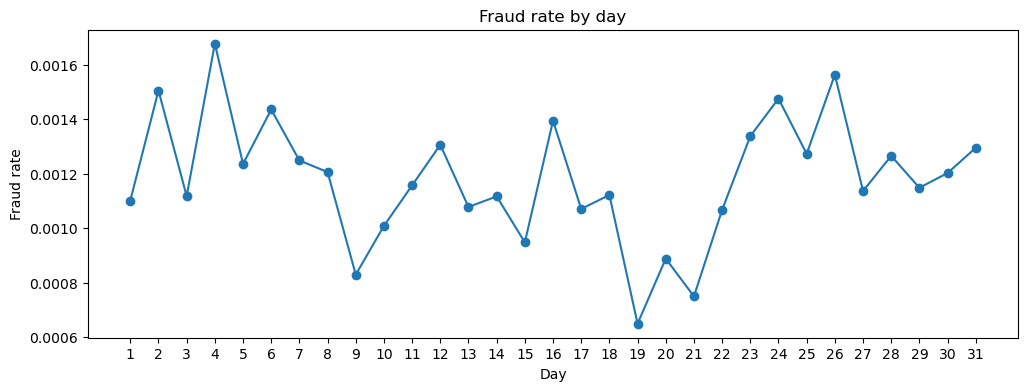

In [40]:
daily = data.groupby('trans_day')['is_fraud'].mean().sort_index(ascending=True)

plt.figure(figsize=(12, 4))
daily.plot(kind='line', marker='o')
plt.xticks(rotation=0)
plt.xlabel('Day')
plt.ylabel('Fraud rate')
plt.title('Fraud rate by day')
plt.xticks(daily.index, daily.index)

plt.show()

In [41]:
monthly

trans_month
1     0.001528
2     0.001656
3     0.001696
4     0.001587
5     0.001715
6     0.001318
7     0.000816
8     0.000907
9     0.001207
10    0.001194
11    0.001267
12    0.000406
Name: is_fraud, dtype: float64

Conclusions:
-  The fraud rates appear to exhibit some seasonal variation. Months 6 and 7 (June and July) have the lowest fraud rates, while months 4 and 5 (April and May) have the highest fraud rates. This suggests a possible pattern where fraud rates increase during the spring season and decrease during the summer months.
- The fraud rate experiences a significant drop in December (month 12), with a value of 0.000406. This could be due to increased security measures and vigilance during the holiday season when fraudulent activities are often targeted.

## 2.8 Trans category
category

In [42]:
data.category.value_counts()

shopping_pos      420268
home              403237
grocery_pos       401000
kids_pets         372055
gas_transport     365233
food_dining       320989
entertainment     312478
shopping_net      307013
personal_care     300730
misc_pos          281977
health_fitness    265986
misc_net          191290
grocery_net       181614
travel            137034
Name: category, dtype: int64

In [43]:
# average fraud rate for each category
data.groupby('category')['is_fraud'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)

,mean,count
category,,
shopping_net,0.003772,307013
misc_net,0.003356,191290
grocery_pos,0.002945,401000
shopping_pos,0.001516,420268
gas_transport,0.001106,365233
misc_pos,0.000557,281977
entertainment,0.000480,312478
travel,0.000460,137034
personal_care,0.000452,300730


## 2.9 amount

In [44]:
# statistics of amount in each is_fraud group
data.groupby('is_fraud')['amt'].describe()

,count,mean,std,min,25%,50%,75%,max
is_fraud,,,,,,,,
0,4255870.0,68.429845,160.562767,1.0,9.090,44.440,81.46,41300.53
1,5034.0,540.778381,391.595613,2.0,262.095,469.675,915.23,1378.09


Conclusion: the amt in fraudulent transactions are much higher than that in non-fraudulent transactions

## 2.10 merchant

In [45]:
data['merchant'].str.lower().nunique()

21977

In [46]:
data[['merch_lat', 'merch_long']].drop_duplicates().shape

(4260904, 2)

In [47]:
# since each merchant has location, we can drop merchant name
data.drop(columns=['merchant'], inplace=True)

In [48]:
data.head(3)

,gender,city,state,zip,lat,long,city_pop,job,category,amt,is_fraud,merch_lat,merch_long,age,trans_year,trans_month,trans_day,trans_hour
0,0,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,gas_transport,69.12,0,39.491416,-75.588522,64,2019,5,24,17
1,0,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,grocery_pos,68.11,0,40.890319,-75.573359,64,2019,9,25,15
2,0,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,misc_net,40.35,0,39.244958,-74.475327,64,2019,12,24,16


# 3. Model Training

In [49]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score

In [50]:
X = data.drop([target], axis=1).copy()
y = data[target].astype(int)

# split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123)

In [51]:
y_train.value_counts(normalize=True)

0    0.998833
1    0.001167
Name: is_fraud, dtype: float64

In [52]:
y_test.value_counts(normalize=True)

0    0.998785
1    0.001215
Name: is_fraud, dtype: float64

In [53]:
X_train.shape, X_test.shape

((2982632, 17), (1278272, 17))

In [54]:
def report_result(y_test_pred, y_test_pred_proba):
    print('Accuracy:', accuracy_score(y_test, y_test_pred))
    # recall
    print('Recall:', recall_score(y_test, y_test_pred))
    # precision
    print('Precision:', precision_score(y_test, y_test_pred))
    # f1 score
    print('F1 score:', f1_score(y_test, y_test_pred))

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    # confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('True')

    # roc curve
    plt.subplot(1, 2, 2)
    fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

## 3.1 Logistic Regression (baseline)

In [55]:
model = LogisticRegression(random_state=123)
# logistic regression only works with numeric features
model.fit(X_train.select_dtypes('number'), y_train)

LogisticRegression(random_state=123)

Accuracy: 0.9987475279126822
Recall: 0.0
Precision: 0.0
F1 score: 0.0


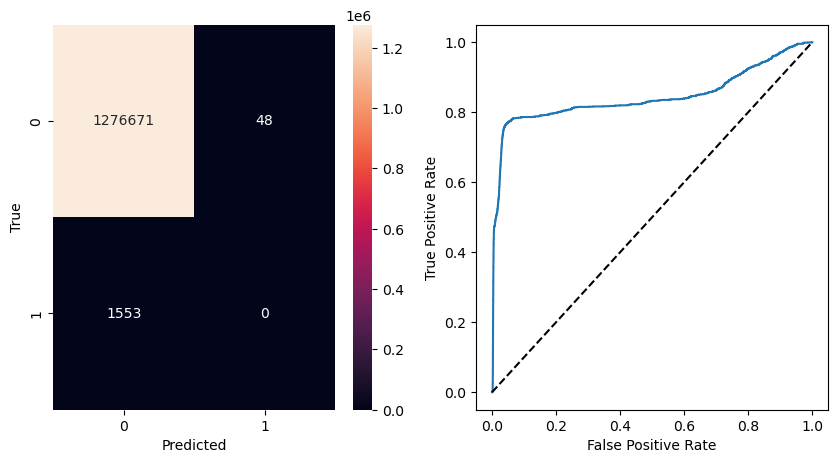

In [56]:
y_test_pred = model.predict(X_test.select_dtypes('number'))
y_test_pred_proba = model.predict_proba(X_test.select_dtypes('number'))[:, 1]
report_result(y_test_pred, y_test_pred_proba)

Conclusion: 
- the model performs very bad, thought the accuracy is 0.998, other metrics are all zero, because the data is highly imbalanced, all the transactions are predicted as non-fraudulent
- it's meaningless because in the real world, the fraud transactions are very rare, thus we usually care about the recall, so when suspicious transactions are detected, we can further investigate them and alart the users

## 3.2 Decision tree
Now I try to improve the perfomance by using a tree classificer

In [57]:
from sklearn.tree import DecisionTreeClassifier

Accuracy: 0.9990745318680219
Recall: 0.30779137153895686
Precision: 0.8156996587030717
F1 score: 0.44693782141187477


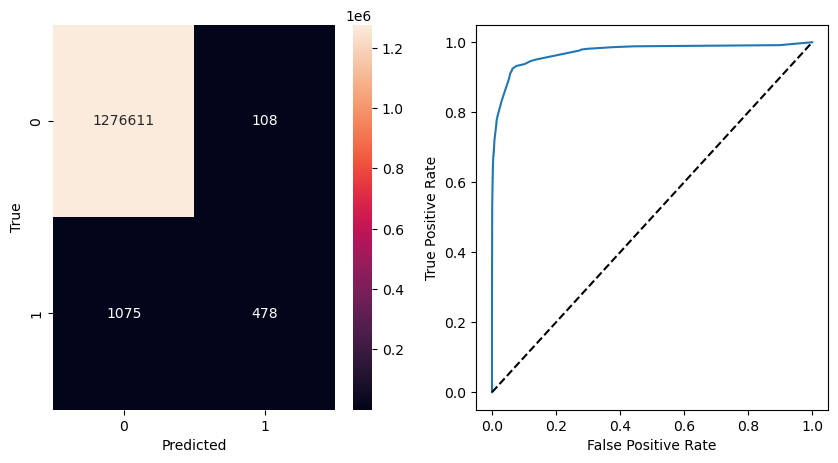

In [58]:
model = DecisionTreeClassifier(max_depth=7)
model.fit(X_train.select_dtypes('number'), y_train)

y_test_pred = model.predict(X_test.select_dtypes('number'))
y_test_pred_proba = model.predict_proba(X_test.select_dtypes('number'))[:, 1]

report_result(y_test_pred, y_test_pred_proba)

Conclusion:
1. compared with the basline model, the accuracy/Recall/Precision/F1 all improved, we have a better model which is more reasonable, the recall is about 0.310, which means we can detect 31.0% of the fraud transactions, the precision is 0.874, which means 87.4% of the transactions we predicted as fraud are actually fraud, which is a good result
2. the model is still not good enough, we need to further improve it, the recall is still low, we need to detect more fraud transactions

## 3.3 LightGBM

LightGBM is an efficient gradient boosting framework based on decision tree algorithms.

https://lightgbm.readthedocs.io/en/v3.3.2/

In [59]:
import lightgbm as lgb

In [60]:
categorial_features = ['city', 'state', 'zip', 'job', 'category']

X_train_ = X_train.copy()
X_test_ = X_test.copy()
for col in categorial_features:
    X_train_[col] = X_train_[col].astype('category')
    X_test_[col] = X_test_[col].astype('category')

### 3.2.1 LightGBM with default parameters

In [61]:
model = lgb.LGBMClassifier()

model.fit(X_train_, y_train,)

LGBMClassifier()

Accuracy: 0.9986998072397737
Recall: 0.4874436574372183
Precision: 0.46642020948860136
F1 score: 0.4767002518891687


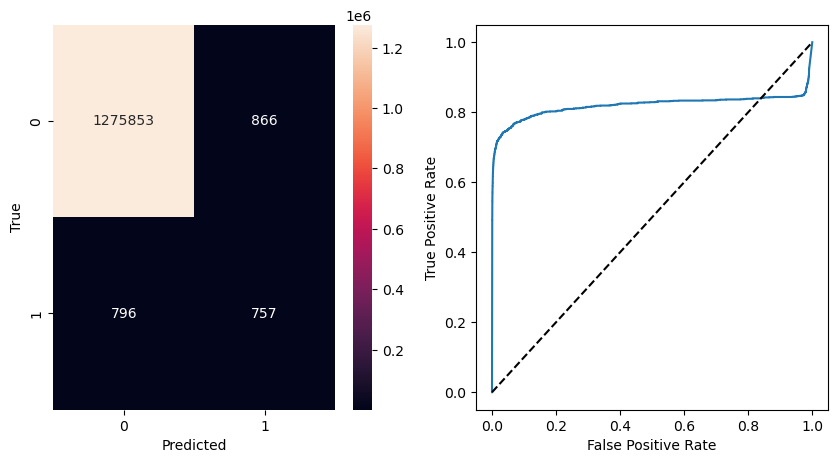

In [62]:
y_test_pred = model.predict(X_test_)
y_test_pred_proba = model.predict_proba(X_test_)[:, 1]
report_result(y_test_pred, y_test_pred_proba)

Conclusion:
- compared with decision tree model, the recall is improved from 0.310 to 0.500, however, the precision is decreased from 0.874 to 0.483, which means we can detect more fraud transactions, but the precision is lower

### 3.2.2 Improve LightGBM with data balancing

In [63]:
y_train.value_counts(normalize=True)

0    0.998833
1    0.001167
Name: is_fraud, dtype: float64

In [64]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

In [65]:
count = y_train.value_counts()

In [66]:
# smote only works with numeric features
for col in categorial_features:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
smote = SMOTE(sampling_strategy={0: count[0], 1: count[1] * 50})
# resample ONLY the X_train, y_train
X_train_resample, y_train_resample = smote.fit_resample(X_train, y_train)
y_train_resample.value_counts(normalize=True)

0    0.944802
1    0.055198
Name: is_fraud, dtype: float64

Accuracy: 0.9977485230060582
Recall: 0.8403090792015454
Precision: 0.33163913595933925
F1 score: 0.4755830903790087


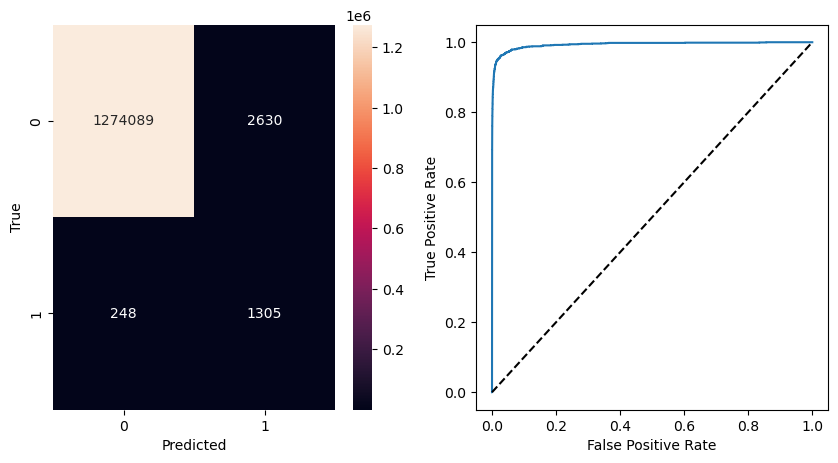

In [67]:
model.fit(X_train_resample, y_train_resample)
y_test_pred = model.predict(X_test)
y_test_pred_proba = model.predict_proba(X_test)[:, 1]
report_result(y_test_pred, y_test_pred_proba)

Improve the positive class ratio

Accuracy: 0.9968300956290993
Recall: 0.8692852543464262
Precision: 0.259665320253895
F1 score: 0.39988151658767773


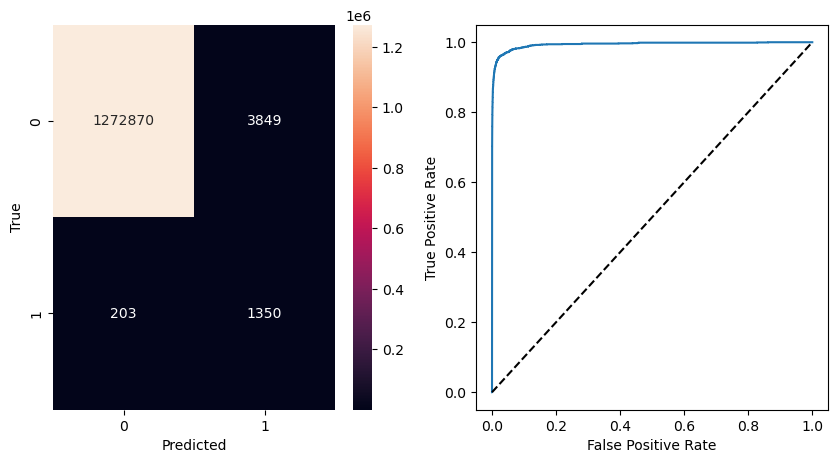

In [68]:
smote = SMOTE(sampling_strategy={0: count[0], 1: count[1] * 80})
# resample ONLY the X_train, y_train
X_train_resample, y_train_resample = smote.fit_resample(X_train, y_train)
y_train_resample.value_counts(normalize=True)

model = lgb.LGBMClassifier()
model.fit(X_train_resample, y_train_resample)
y_test_pred = model.predict(X_test)
y_test_pred_proba = model.predict_proba(X_test)[:, 1]
report_result(y_test_pred, y_test_pred_proba)

Conclusion:
1. in the data imbalance case, we care more about the recall score, because we want to detect as many fraudsters as possible
2. with a LGMB model, we can achieve a recall score of 0.57, which is much better than the baseline model
3. by using SMOTE to balance the data, we can achieve a recall score of 0.86, which is much better than the previous model

## 3.4 XGBoost

In [69]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [70]:
# model = xgb.XGBClassifier()
# search_space = {
#     # uncomment below if you have enough time
#     # 'n_estimators': [50, 100],
#     # 'max_depth': [5, 7, 9, 11], 
# }
# grid = GridSearchCV(model, search_space, cv=3, scoring='roc_auc')
# grid.fit(X_train_resample, y_train_resample)
# print('Best parameters:', grid.best_params_)
# model = grid.best_estimator_

Accuracy: 0.9987303171781906
Recall: 0.8898905344494527
Precision: 0.4876499647141849
F1 score: 0.6300433097788922


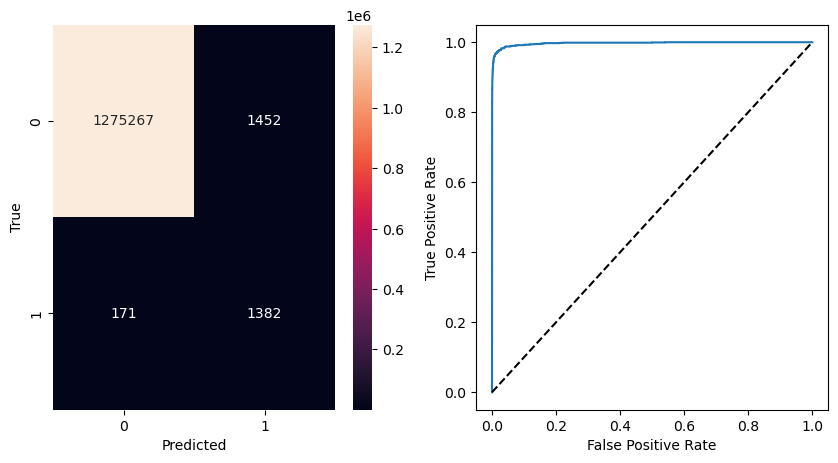

In [71]:
model = xgb.XGBClassifier()
model.fit(X_train_resample, y_train_resample)
y_test_pred = model.predict(X_test)
y_test_pred_proba = model.predict_proba(X_test)[:, 1]
report_result(y_test_pred, y_test_pred_proba)

Conclusion:
1. after resample, xgboost model reach much better result than the lightgbm model, the accuracy is improved from 0.9968121025884945 to 0.9986622565463376, and the recall is further improved from 0.8685567010309279 to 0.8962628865979382 with precision also improved from 0.2582870281663154 to 0.47312925170068026. Suprisingly, it means the model has improved recall without lossing precision. Also f1 score is improved from 0.3981686604637424 to 0.6193232413178984
2. the result shows xgboost model is a more robust model than the lightgbm model in such case.

# Conclusion

A summary of the results is shown in the table

| model | Accuracy | Recall | Precision | F1 score |
| --- | --- | --- | --- | --- |
| Logistic Regression | 0.9988 | 0.0 | 0.0 | 0.0 |
| Decision Tree | **0.9991** | 0.3071 | 0.8182 | 0.4466 |
| LightGBM | 0.9976 | 0.8281 | 0.3150 | 0.4564 |
| XGBoost | 0.9987 | **0.8963** | **0.4731** | **0.6193** |




## Experiment conclusion
- We experimented with different models to identify the best approach for fraud detection. Specifically, we implemented a decision tree model and ensemble models like LightGBM and XGBoost. These models showed promising results in capturing fraud patterns. Though the decision tree model achieved the highest precision and accuracy, it had the lowest recall. On the other hand, the ensemble models had higher recall but lower precision. However
- Fraud detection inherently involves dealing with imbalanced data, where the number of legitimate transactions significantly outweighs the number of fraudulent transactions. This imbalance impacts the evaluation metrics, particularly precision and recall. In this situation, accuracy is not a good metric to evaluate the performance of the model. Instead, we should focus on precision and recall. Achieving high precision ensures that the majority of flagged transactions are truly fraudulent, minimizing false positives. On the other hand, maximizing recall is crucial to identifying as many fraudulent transactions as possible, minimizing false negatives. 
- The tradeoff between precision and recall depends on the specific requirements of the fraud detection system and the associated costs of false positives and false negatives. For example, if the cost of false positives is high, then the decision tree model would be the best choice. On the other hand, if the cost of false negatives is high, then the ensemble models would be the best choice.
- I select the XGBoost model as the final model because it has the highest F1 score and recall, in the practical application, we want to minimize the false negatives, which means we want to maximize the recall, so alarms can be triggered when there is a suspicious fraud transaction and the cost of false positives is relatively low. The tuned XGBoost model has the highest recall, which means it can capture the most fraud transactions.

## Limitations:
- Large Dataset: The size of the dataset used in this project posed a challenge in terms of computational resources and time constraints. Due to the time-consuming nature of parameter tuning, we were unable to exhaustively explore all possible combinations of hyperparameters for our models. Consequently, there may be potential performance improvements that could have been achieved with more extensive parameter tuning.
- Data Quality: The accuracy and reliability of the fraud detection model heavily rely on the quality and representativeness of the dataset. In this project, we assumed the provided dataset to be comprehensive and free from biases or errors. However, there is always a risk of data quality issues, such as missing values, mislabeled instances, or incomplete information. These data quality issues can impact the performance and accuracy of the model.